# Boundaries from Ordnance Survey Ireland / Northern Ireland

In [1]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import ZipFile
import geopandas as gpd
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import climag.plot_configs as cplt
from climag.download_data import download_data

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2022-10-19 13:32:48.373348+00:00


In [3]:
# base data download directory
DATA_DIR = os.path.join("data", "boundary")

In [4]:
GPKG_BOUNDARY = os.path.join(DATA_DIR, "boundaries.gpkg")

##  Counties - OSi National Statutory Boundaries - 2019

<https://data-osi.opendata.arcgis.com/datasets/osi::counties-osi-national-statutory-boundaries-2019/about>

In [5]:
SUB_DIR = os.path.join(DATA_DIR, "admin-osi", "raw")

In [8]:
# download data if necessary
URL = (
    "https://data-osi.opendata.arcgis.com/datasets/"
    "osi::counties-osi-national-statutory-boundaries-2019.zip"
)

payload = {
    "outSR": {
        "latestWkid": "2157",
        "wkid": "2157"
    }
}

download_data(server=URL, dl_dir=SUB_DIR, params=payload)

Data successfully downloaded to data/boundary/admin-osi/raw 
Last downloaded: 2022-09-19 13:53:33.920306+00:00


In [7]:
os.listdir(SUB_DIR)

['Counties_-_OSi_National_Statutory_Boundaries_-_2019.zip']

In [6]:
ZIP_FILE = os.path.join(
    SUB_DIR, "Counties_-_OSi_National_Statutory_Boundaries_-_2019.zip"
)

In [9]:
# list of files/folders in the ZIP archive
ZipFile(ZIP_FILE).namelist()

['Counties___OSi_National_Statutory_Boundaries_.shp',
 'Counties___OSi_National_Statutory_Boundaries_.shx',
 'Counties___OSi_National_Statutory_Boundaries_.dbf',
 'Counties___OSi_National_Statutory_Boundaries_.cpg',
 'Counties___OSi_National_Statutory_Boundaries_.prj',
 'Counties_-_OSi_National_Statutory_Boundaries_-_2019.xml']

In [7]:
osi = gpd.read_file(
    f"zip://{ZIP_FILE}!Counties___OSi_National_Statutory_Boundaries_.shp"
)

In [8]:
osi

,OBJECTID,CO_ID,ENGLISH,GAEILGE,LOGAINM_ID,GUID,CONTAE,COUNTY,PROVINCE,CENTROID_X,CENTROID_Y,AREA,SHAPE_Leng,SHAPE_Area,geometry
0,1,50000,DONEGAL,Dún na nGall,100013,2ae19629-1452-13a3-e055-000000000001,Dún na nGall,DONEGAL,Ulster,607296.31,911848.45,4.860754e+09,23.413054,0.681241,"MULTIPOLYGON (((-8.08145 55.15957, -8.08144 55..."
1,2,120000,LIMERICK,Luimneach,100022,2ae19629-1440-13a3-e055-000000000001,Luimneach,LIMERICK,Munster,548318.75,640943.05,2.754926e+09,4.766632,0.364631,"POLYGON ((-8.50852 52.74196, -8.50851 52.74209..."
2,3,80000,KILDARE,Cill Dara,100007,2ae19629-1455-13a3-e055-000000000001,Cill Dara,KILDARE,Leinster,678993.60,712090.40,1.694083e+09,3.632523,0.227785,"POLYGON ((-6.49499 53.35338, -6.49486 53.35333..."
3,4,220000,WATERFORD,Port Láirge,100026,2ae19629-144b-13a3-e055-000000000001,Port Láirge,WATERFORD,Munster,630336.80,599955.37,1.857038e+09,5.543357,0.244035,"MULTIPOLYGON (((-7.59463 52.09696, -7.59459 52..."
4,5,260000,DUBLIN,Baile Átha Cliath,100002,2ae19629-144f-13a3-e055-000000000001,Baile Átha Cliath,DUBLIN,Leinster,714929.28,740960.44,9.257609e+08,4.487794,0.125039,"MULTIPOLYGON (((-6.45116 53.39150, -6.45115 53..."
5,6,230000,WESTMEATH,An Iarmhí,100016,2ae19629-144c-13a3-e055-000000000001,An Iarmhí,WESTMEATH,Leinster,635445.42,756679.97,1.838310e+09,3.570632,0.249155,"POLYGON ((-7.37886 53.33799, -7.37887 53.33796..."
6,7,170000,MONAGHAN,Muineachán,100025,2ae19629-1445-13a3-e055-000000000001,Muineachán,MONAGHAN,Ulster,669110.41,824170.57,1.294164e+09,3.712200,0.178010,"POLYGON ((-6.83442 54.26331, -6.83433 54.26323..."
7,8,250000,WICKLOW,Cill Mhantáin,100008,2ae19629-144e-13a3-e055-000000000001,Cill Mhantáin,WICKLOW,Leinster,707784.79,690738.10,2.025161e+09,3.813169,0.270939,"MULTIPOLYGON (((-6.14602 52.78372, -6.14607 52..."
8,9,40000,CORK,Corcaigh,100010,2ae19629-1451-13a3-e055-000000000001,Corcaigh,CORK,Munster,527532.69,573117.78,7.502635e+09,24.152240,0.980267,"MULTIPOLYGON (((-8.88272 52.33197, -8.88297 52..."
9,10,70000,KERRY,Ciarraí,100005,2ae19629-1454-13a3-e055-000000000001,Ciarraí,KERRY,Munster,469696.21,600519.77,4.812989e+09,18.438930,0.631513,"MULTIPOLYGON (((-10.27649 52.13668, -10.27643 ..."


In [9]:
osi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

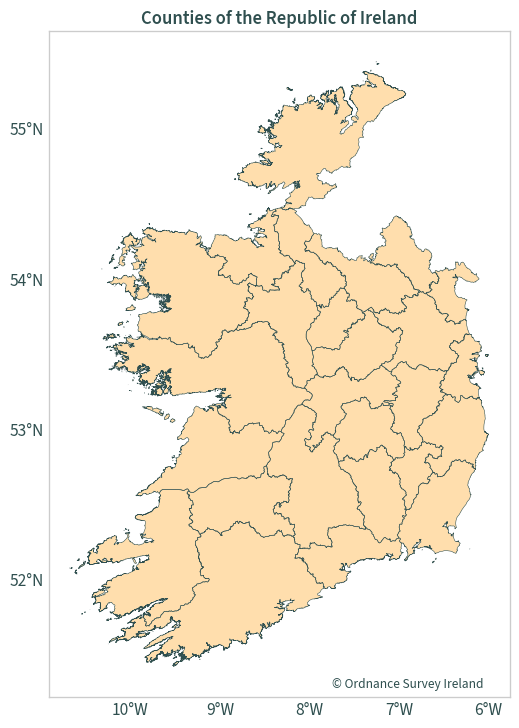

In [10]:
base = osi.plot(color="navajowhite", figsize=(9, 9))
osi.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)

base.xaxis.set_major_formatter(cplt.longitude_tick_format)
base.yaxis.set_major_formatter(cplt.latitude_tick_format)
base.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Counties of the Republic of Ireland")
plt.text(
    -7.75, 51.275,
    "© Ordnance Survey Ireland"
)

plt.show()

In [11]:
osi.to_file(GPKG_BOUNDARY, layer="OSi_Counties")

## OSNI Open Data - Largescale Boundaries - County Boundaries

<https://www.opendatani.gov.uk/dataset/osni-open-data-largescale-boundaries-county-boundaries1>

In [11]:
SUB_DIR = os.path.join(DATA_DIR, "admin-osni", "raw")

In [16]:
# download data if necessary
URL = (
    "https://osni-spatialni.opendata.arcgis.com/datasets/spatialni::"
    "osni-open-data-largescale-boundaries-county-boundaries-.zip"
)

payload = {
    "outSR": {
        "latestWkid": "29902",
        "wkid": "29900"
    }
}

download_data(server=URL, dl_dir=SUB_DIR, params=payload)

Data successfully downloaded to data/boundary/admin-osni/raw 
Last downloaded: 2022-10-16 01:10:10.108369+00:00


In [17]:
os.listdir(SUB_DIR)

['OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.zip']

In [12]:
ZIP_FILE = os.path.join(
    SUB_DIR, "OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.zip"
)

In [19]:
# list of files/folders in the ZIP archive
ZipFile(ZIP_FILE).namelist()

['OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.shp',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.shx',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.dbf',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.cpg',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.prj',
 'OSNI_Open_Data_-_Largescale_Boundaries_-_County_Boundaries_.xml']

In [13]:
osni = gpd.read_file(
    f"zip://{ZIP_FILE}!OSNI_Open_Data_-_Largescale_Boundaries_-_"
    "County_Boundaries_.shp"
)

In [14]:
osni

,COUNTY_ID,CountyName,Area_SqKM,OBJECTID,geometry
0,6,TYRONE,3265.796622,1,"POLYGON ((-7.38177 54.94208, -7.38170 54.94201..."
1,1,ANTRIM,3097.847750,2,"MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54..."
2,2,ARMAGH,1327.228438,3,"POLYGON ((-6.35398 54.50927, -6.35191 54.50891..."
3,4,FERMANAGH,1850.832538,4,"POLYGON ((-7.69417 54.60511, -7.69390 54.60498..."
4,5,LONDONDERRY,2118.316853,5,"POLYGON ((-6.66919 55.19899, -6.66918 55.19893..."
5,3,DOWN,2491.238606,6,"MULTIPOLYGON (((-6.07945 54.04737, -6.07950 54..."


In [15]:
osni.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
# rename Londonderry to Derry
osni.replace("LONDONDERRY", "DERRY", inplace=True)

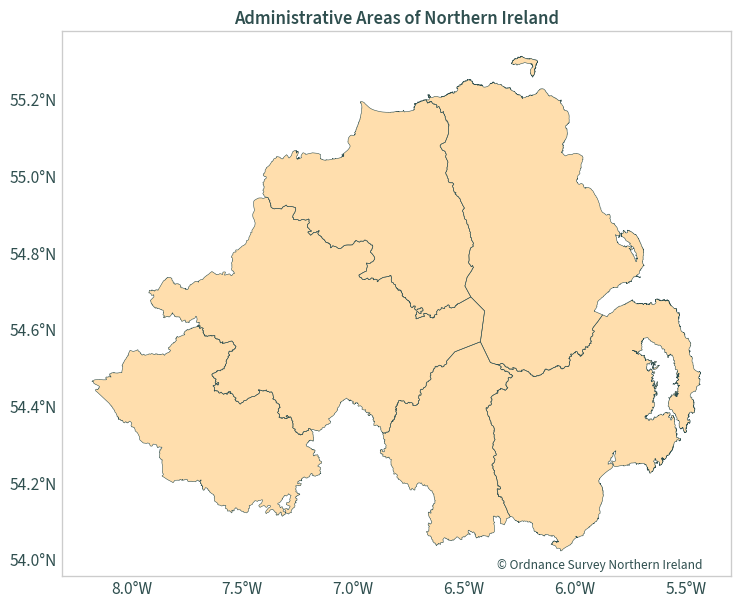

In [39]:
ax = osni.plot(color="navajowhite", figsize=(9, 9))
osni.boundary.plot(ax=ax, color="darkslategrey", linewidth=.4)

def longitude_tick(x, pos):
    """
    Return the longitude in degrees west.
    The two arguments are the value and tick position.
    https://matplotlib.org/stable/gallery/ticks/tick-formatters.html
    """
    return "{:,.1f}°W".format(x * -1)

ax.xaxis.set_major_formatter(longitude_tick)
ax.yaxis.set_major_formatter("{x:.1f}°N")

plt.title("Administrative Areas of Northern Ireland")
plt.text(
    -6.35, 53.975,
    "© Ordnance Survey Northern Ireland"
)

plt.show()

In [24]:
osni.to_file(GPKG_BOUNDARY, layer="OSNI_Counties")

## County boundaries - Island of Ireland

In [40]:
osi_counties = osi[["CONTAE", "COUNTY", "PROVINCE", "geometry"]]

In [41]:
osi_counties

,CONTAE,COUNTY,PROVINCE,geometry
0,Dún na nGall,DONEGAL,Ulster,"MULTIPOLYGON (((-8.08145 55.15957, -8.08144 55..."
1,Luimneach,LIMERICK,Munster,"POLYGON ((-8.50852 52.74196, -8.50851 52.74209..."
2,Cill Dara,KILDARE,Leinster,"POLYGON ((-6.49499 53.35338, -6.49486 53.35333..."
3,Port Láirge,WATERFORD,Munster,"MULTIPOLYGON (((-7.59463 52.09696, -7.59459 52..."
4,Baile Átha Cliath,DUBLIN,Leinster,"MULTIPOLYGON (((-6.45116 53.39150, -6.45115 53..."
5,An Iarmhí,WESTMEATH,Leinster,"POLYGON ((-7.37886 53.33799, -7.37887 53.33796..."
6,Muineachán,MONAGHAN,Ulster,"POLYGON ((-6.83442 54.26331, -6.83433 54.26323..."
7,Cill Mhantáin,WICKLOW,Leinster,"MULTIPOLYGON (((-6.14602 52.78372, -6.14607 52..."
8,Corcaigh,CORK,Munster,"MULTIPOLYGON (((-8.88272 52.33197, -8.88297 52..."
9,Ciarraí,KERRY,Munster,"MULTIPOLYGON (((-10.27649 52.13668, -10.27643 ..."


In [42]:
osni_counties = osni.rename(columns={"CountyName": "COUNTY"})

In [43]:
osni_counties = osni_counties[["geometry", "COUNTY"]]

In [44]:
# https://en.wikipedia.org/wiki/Counties_of_Ireland
contae = {
    "ANTRIM": "Aontroim",
    "ARMAGH": "Ard Mhacha",
    "DOWN": "An Dún",
    "FERMANAGH": "Fear Manach",
    "DERRY": "Doire",
    "TYRONE": "Tír Eoghain"
}

In [45]:
osni_counties["CONTAE"] = osni_counties["COUNTY"].map(contae)

In [46]:
osni_counties["PROVINCE"] = "Ulster"

In [47]:
osni_counties

,geometry,COUNTY,CONTAE,PROVINCE
0,"POLYGON ((-7.38177 54.94208, -7.38170 54.94201...",TYRONE,Tír Eoghain,Ulster
1,"MULTIPOLYGON (((-5.95296 54.55222, -5.95298 54...",ANTRIM,Aontroim,Ulster
2,"POLYGON ((-6.35398 54.50927, -6.35191 54.50891...",ARMAGH,Ard Mhacha,Ulster
3,"POLYGON ((-7.69417 54.60511, -7.69390 54.60498...",FERMANAGH,Fear Manach,Ulster
4,"POLYGON ((-6.66919 55.19899, -6.66918 55.19893...",DERRY,Doire,Ulster
5,"MULTIPOLYGON (((-6.07945 54.04737, -6.07950 54...",DOWN,An Dún,Ulster


In [48]:
# reproject to Irish Transverse Mercator
osi_counties = osi_counties.to_crs(2157)

In [49]:
osni_counties = osni_counties.to_crs(2157)

In [50]:
# remove overlapping areas in OSi layer
osi_counties = osi_counties.overlay(osni_counties, how="difference")

In [51]:
# merge county layers
ie_counties = osi_counties.merge(osni_counties, how="outer")

In [52]:
ie_counties

,CONTAE,COUNTY,PROVINCE,geometry
0,Dún na nGall,DONEGAL,Ulster,"MULTIPOLYGON (((668515.913 943718.890, 668514...."
1,Luimneach,LIMERICK,Munster,"POLYGON ((565662.328 665775.167, 565663.255 66..."
2,Cill Dara,KILDARE,Leinster,"POLYGON ((700193.727 734740.683, 700202.676 73..."
3,Port Láirge,WATERFORD,Munster,"MULTIPOLYGON (((627774.638 593971.494, 627777...."
4,Baile Átha Cliath,DUBLIN,Leinster,"MULTIPOLYGON (((730410.012 750574.906, 730401...."
5,An Iarmhí,WESTMEATH,Leinster,"POLYGON ((641367.591 732152.211, 641366.980 73..."
6,Muineachán,MONAGHAN,Ulster,"MULTIPOLYGON (((675985.454 835478.726, 676014...."
7,Cill Mhantáin,WICKLOW,Leinster,"MULTIPOLYGON (((725064.152 671911.669, 725060...."
8,Corcaigh,CORK,Munster,"MULTIPOLYGON (((539837.098 620406.502, 539820...."
9,Ciarraí,KERRY,Munster,"MULTIPOLYGON (((444169.720 600758.236, 444174...."


In [53]:
# new colour map
# https://stackoverflow.com/a/31052741
# sample the colormaps that you want to use. Use 20 from each so we get 40
# colors in total
colors1 = plt.cm.tab20b(np.linspace(0., 1, 20))
colors2 = plt.cm.tab20c(np.linspace(0, 1, 20))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))

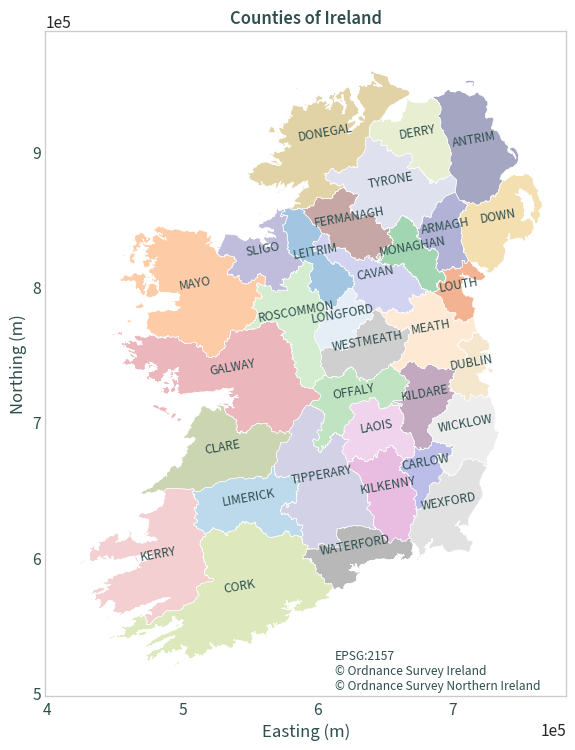

In [54]:
# categorical map - labels directly on plot
base = ie_counties.plot(
    cmap=mcolors.ListedColormap(colors),
    figsize=(9, 9), column="COUNTY", alpha=.45
)

ie_counties.boundary.plot(color="white", ax=base, linewidth=.4)

plt.ticklabel_format(style="scientific", scilimits=[-4, 4])
base.xaxis.set_major_locator(ticker.MultipleLocator(1e5))

# ie_counties.centroid.plot(ax=base, color="darkslategrey", markersize=5)

map_labels = zip(
    zip(ie_counties.centroid.x, ie_counties.centroid.y),
    ie_counties["COUNTY"]
)
for xy, lab in map_labels:
    base.annotate(
        text=lab, xy=xy, textcoords="data", rotation=10, ha="center"
    )

plt.title("Counties of Ireland")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.text(
    612500, 502500,
    "EPSG:2157\n© Ordnance Survey Ireland\n© Ordnance Survey Northern Ireland"
)

plt.show()

In [55]:
ie_counties.crs

<Derived Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [56]:
ie_counties.to_file(GPKG_BOUNDARY, layer="OS_IE_Counties_ITM")

In [40]:
# reproject to EPSG:4326
ie_counties = ie_counties.to_crs(4326)

In [41]:
ie_counties.to_file(GPKG_BOUNDARY, layer="OS_IE_Counties")